In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library

In [7]:
## loading the data
data=pd.read_csv("grok_asg_anomaly.csv") 

In [8]:
data

,timestamp,value
0,2014-01-16 00:00:00,33.5573
1,2014-01-16 00:05:00,33.4460
2,2014-01-16 00:10:00,33.4447
3,2014-01-16 00:15:00,33.3333
4,2014-01-16 00:20:00,33.4447
...,...,...
4616,2014-02-01 00:40:00,0.3380
4617,2014-02-01 00:45:00,0.0000
4618,2014-02-01 00:50:00,0.0000
4619,2014-02-01 00:55:00,0.0000


In [9]:
data.head()#first five rows

,timestamp,value
0,2014-01-16 00:00:00,33.5573
1,2014-01-16 00:05:00,33.4460
2,2014-01-16 00:10:00,33.4447
3,2014-01-16 00:15:00,33.3333
4,2014-01-16 00:20:00,33.4447


In [10]:
data.tail() #last five rows

,timestamp,value
4616,2014-02-01 00:40:00,0.338
4617,2014-02-01 00:45:00,0.000
4618,2014-02-01 00:50:00,0.000
4619,2014-02-01 00:55:00,0.000
4620,2014-02-01 01:00:00,0.334


In [11]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4621 entries, 0 to 4620
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4621 non-null   object 
 1   value      4621 non-null   float64
dtypes: float64(1), object(1)
memory usage: 72.3+ KB


In [12]:
data.describe()
#here we get min ,max ,mean value

,value
count,4621.000000
mean,27.684723
std,13.144795
min,0.000000
25%,33.333300
50%,33.444700
75%,33.557300
max,45.622900


In [13]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

# Basic checks

In [14]:
data.head()#first five rows

,timestamp,value
0,2014-01-16 00:00:00,33.5573
1,2014-01-16 00:05:00,33.4460
2,2014-01-16 00:10:00,33.4447
3,2014-01-16 00:15:00,33.3333
4,2014-01-16 00:20:00,33.4447


In [15]:
data=pd.read_csv('grok_asg_anomaly.csv',parse_dates=[0],index_col='timestamp')

# EDA

import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

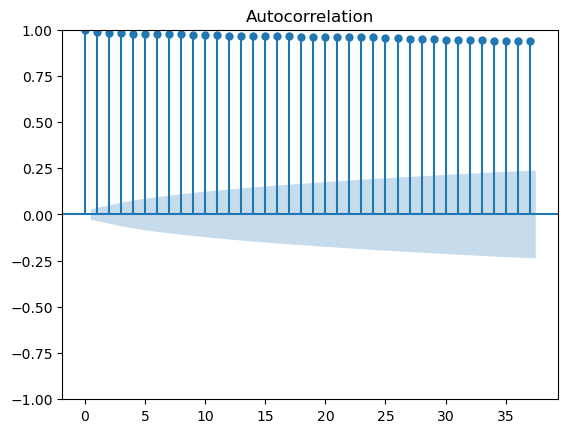

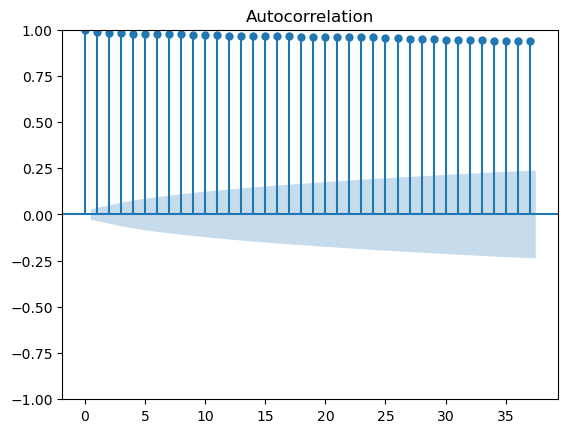

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [17]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -0.6872306404260772
2. P-Value :  0.8500294226198694
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4593
5. Critical Values :
	 1% :  -3.4317745500669052
	 5% :  -2.862169484810712
	 10% :  -2.5671050776361515


In [18]:
data1=data.diff(periods=1)

In [19]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-01-16 00:05:00,-0.1113
2014-01-16 00:10:00,-0.0013
2014-01-16 00:15:00,-0.1114
2014-01-16 00:20:00,0.1114
2014-01-16 00:25:00,0.0000
...,...
2014-02-01 00:40:00,0.3380
2014-02-01 00:45:00,-0.3380
2014-02-01 00:50:00,0.0000


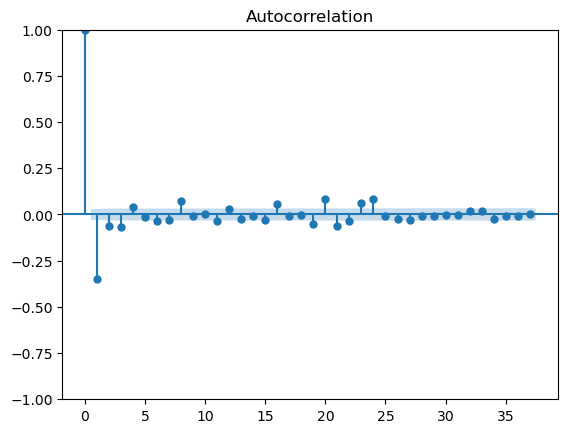

In [20]:
plot_acf(data1); # autocorrelation plot 

In [21]:
data2=data1.diff(periods=1) # differencing applied to data1

In [22]:
data2=data2.iloc[1:] # integrated to the order of 2

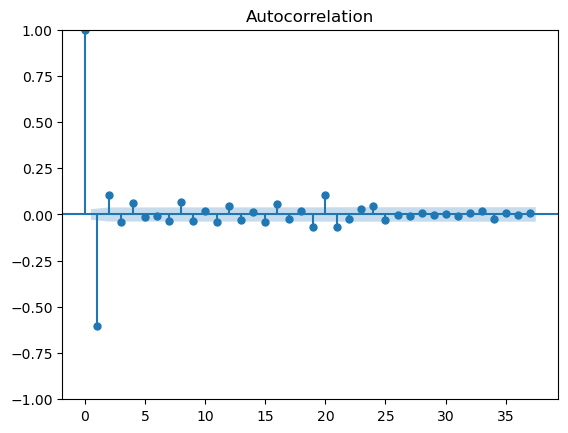

In [23]:
plot_acf(data2);

In [24]:
data2.shape#shape of the data rows and columns

(4619, 1)

In [25]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [26]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4519 entries, 2014-01-16 08:30:00 to 2014-02-01 01:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4519 non-null   float64
dtypes: float64(1)
memory usage: 70.6 KB


In [27]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [28]:

#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[1, 2, 3, 4, 5, 6, 7]

In [29]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 9, 12, 14]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [30]:
##making prediction
prediction=ar_model_fit.predict(start=1,end=142)

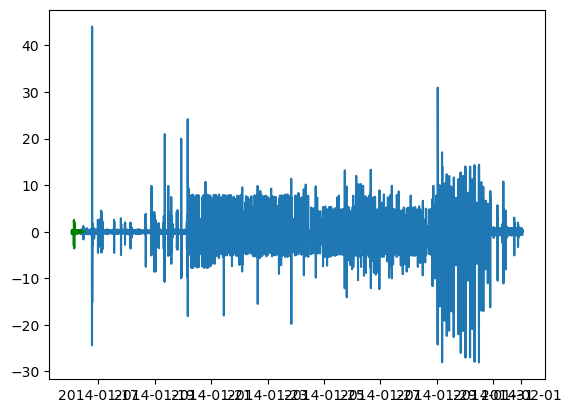

In [31]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [32]:
## ARIMA Model

In [33]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [34]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [35]:
## evaluate the model
print(model_arima_fit.aic)

249.08993945580212


In [36]:
# predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [37]:
prediction

2014-01-16 00:15:00    0.110000
2014-01-16 00:20:00    0.056720
2014-01-16 00:25:00   -0.029514
2014-01-16 00:30:00    0.141899
2014-01-16 00:35:00   -0.084118
                         ...   
2014-01-16 11:40:00    0.080103
2014-01-16 11:45:00    0.080096
2014-01-16 11:50:00    0.080101
2014-01-16 11:55:00    0.080097
2014-01-16 12:00:00    0.080100
Freq: 5T, Name: predicted_mean, Length: 142, dtype: float64

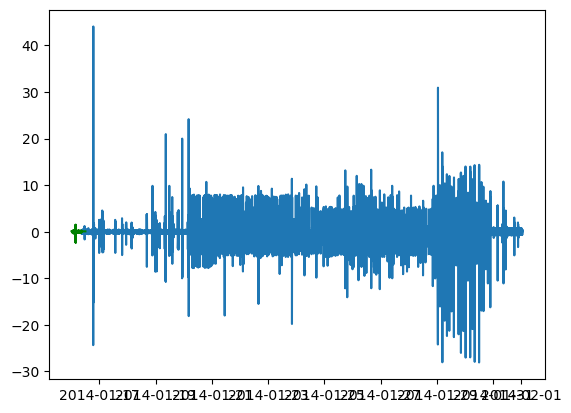

In [38]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [39]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [40]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) 215.78281071789112
(0, 0, 1) 109.70566614124233
(0, 0, 2) 41.25675728740126
(0, 0, 3) 41.18377455007486
(0, 0, 4) 40.54420340919451
(0, 1, 0) 333.2774267710131
(0, 1, 1) 219.26762452812244
(0, 1, 2) 118.48261685680971
(0, 1, 3) 58.29966377049934
(0, 1, 4) 59.56232730247214
(0, 2, 0) 454.44873704370593
(0, 2, 1) 337.52114904612137
(0, 2, 2) 228.50935157367263
(0, 2, 3) 132.9865402350951
(0, 2, 4) 94.228729598124
(0, 3, 0) 575.1322020785399
(0, 3, 1) 457.411786788788
(0, 3, 2) 345.4236893894723
(0, 3, 3) 240.99654976502967
(0, 3, 4) 151.49274360711567
(0, 4, 0) 694.3977126188574
(0, 4, 1) 576.7914916196138
(0, 4, 2) 463.97881675053867
(0, 4, 3) 356.4392168538144
(0, 4, 4) 256.42928689442084
(1, 0, 0) 153.44871800054395
(1, 0, 1) 77.86804139056713
(1, 0, 2) 41.92027597153485
(1, 0, 3) 45.18121042414993
(1, 0, 4) 48.514239182973014
(1, 1, 0) 249.08993945580212
(1, 1, 1) 158.61411034718148
(1, 1, 2) 88.35598286865653
(1, 1, 3) 122.44134617594273
(1, 1, 4) 62.291253072918266
(1, 2,

In [41]:
min(list2)  # lowest aic score

30.445183034573446

In [42]:
loc=list2.index(min(list2))
loc

104

In [43]:
# pdq corresponding to lowest aic
list1[loc]

(4, 0, 4)

In [44]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [45]:
print(model_arima_fit.aic) # confirm aic score

30.604554728209635


In [46]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-01-16 08:30:00    0.028858
2014-01-16 08:35:00   -0.014929
2014-01-16 08:40:00   -0.090803
2014-01-16 08:45:00    0.105432
2014-01-16 08:50:00   -0.014337
2014-01-16 08:55:00    0.002171
2014-01-16 09:00:00   -0.014640
2014-01-16 09:05:00   -0.031982
2014-01-16 09:10:00    0.036320
Freq: 5T, Name: predicted_mean, dtype: float64

In [47]:
prediction=model_arima_fit.predict(start=100,end=142)

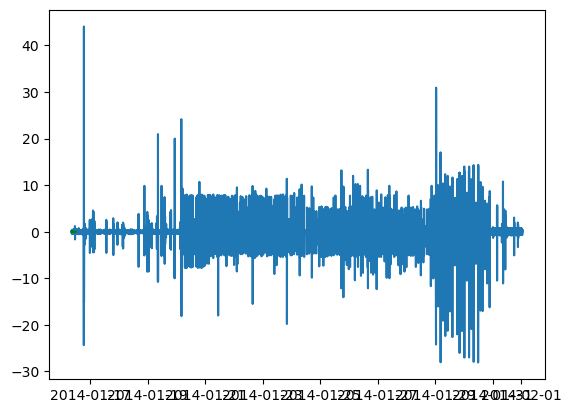

In [48]:
plt.plot(test)
plt.plot(prediction,color='green') 

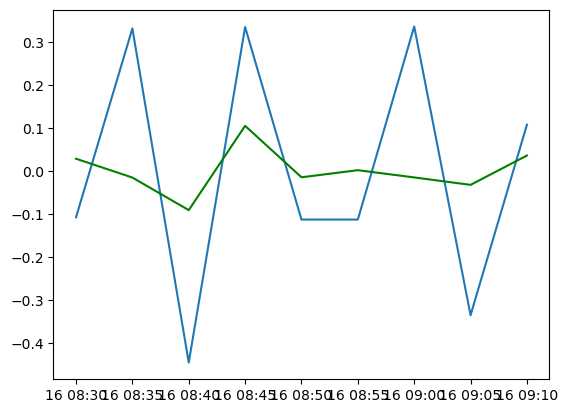

In [49]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [50]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([-0.1074,  0.3321, -0.4454,  0.3354, -0.1127, -0.1127,  0.3367,
       -0.3353,  0.108 , -0.1061,  0.3348, -0.4508,  0.4481, -0.4454,
        0.2227,  0.224 , -0.448 ,  0.4447, -0.4414,  0.4434, -0.4454,
        0.4434, -0.4414,  0.2207,  0.2254])

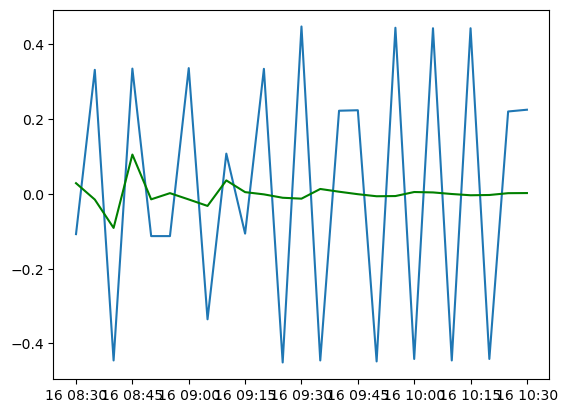

In [51]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [52]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 0.11514951255016809,
 'mae': 0.3122405004126632,
 'rmse': 0.33933687178107846}

In [53]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

0.33933687178107846


0.11514951255016809

# Conclusion